"Data-Driven Decisions in E-Commerce: A Customer-Centric Study"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('Ecommerce Customers.unknown')
df.to_csv('Ecommerce Customers.csv')

In [ ]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df.shape

(500, 8)

In [ ]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
df.isnull().sum()

,0
Email,0
Address,0
Avatar,0
Avg. Session Length,0
Time on App,0
Time on Website,0
Length of Membership,0
Yearly Amount Spent,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
df.dtypes

,0
Email,object
Address,object
Avatar,object
Avg. Session Length,float64
Time on App,float64
Time on Website,float64
Length of Membership,float64
Yearly Amount Spent,float64


In [ ]:
df.size

4000

In [ ]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

<Axes: >

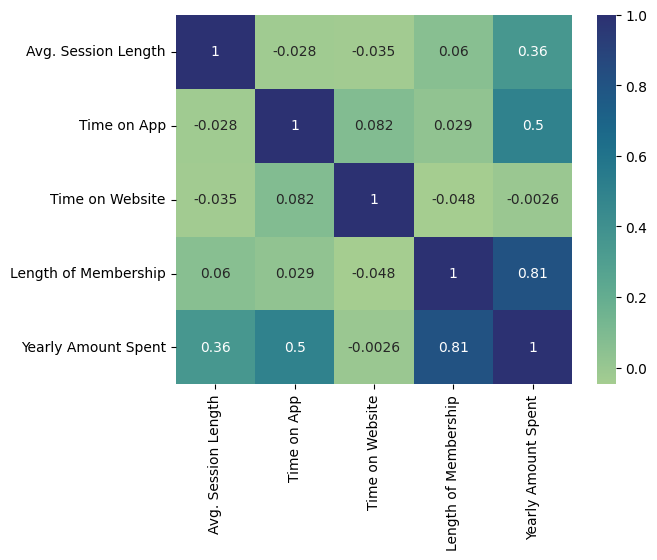

In [ ]:
# Correlation Heatmap
sns.heatmap(df[df.columns[3:8]].corr(), cmap="crest", annot=True)

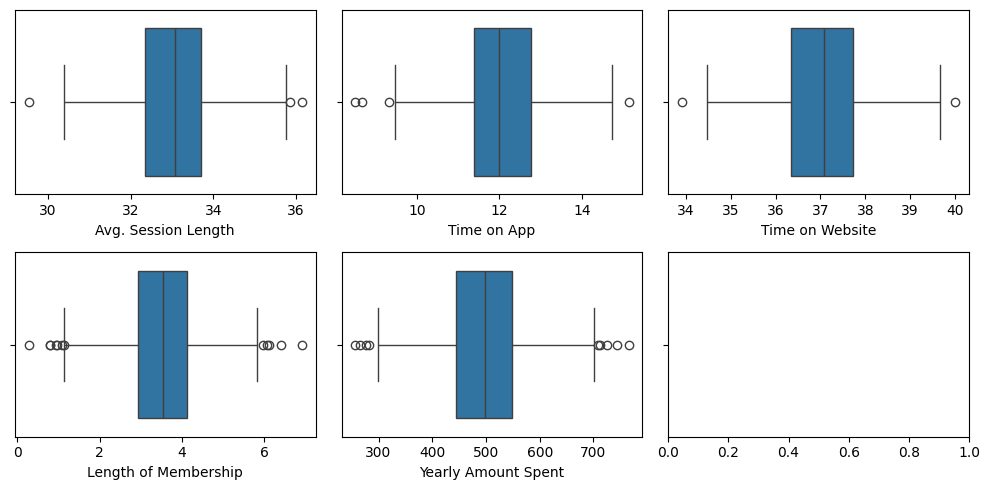

In [ ]:
# Data distribution plot
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(10, 5), sharey=True)

for index, columns in enumerate(df.columns[3:8]):
    sns.boxplot(data=df, x=columns, ax=axis[int(index / 3), index % 3])

plt.tight_layout()

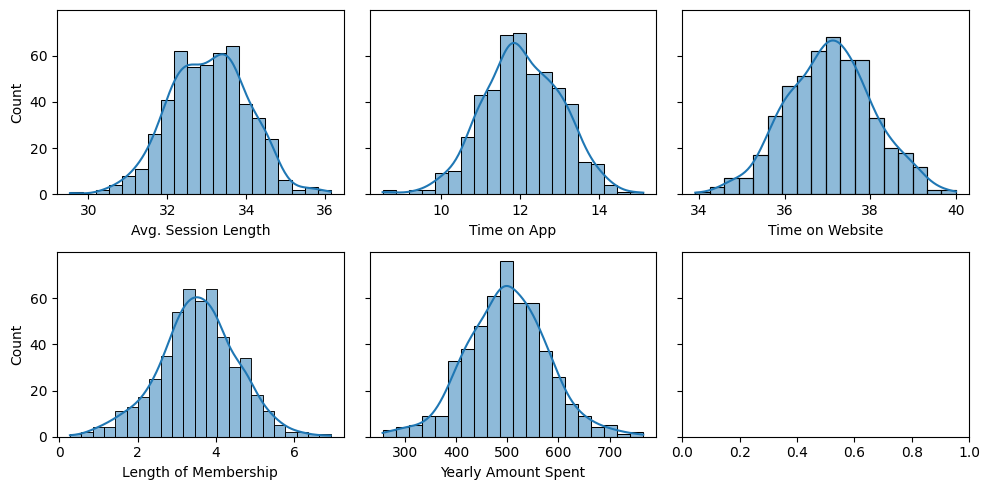

In [ ]:
# Data Distribution histogram
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(10, 5), sharey=True)

for index, columns in enumerate(df.columns[3:8]):
    sns.histplot(data=df, x=columns, ax=axis[int(index / 3), index % 3], kde=True)

plt.tight_layout()

In [ ]:
# Data Cleaning

NaN values: 0
Null values: 0


<Axes: >

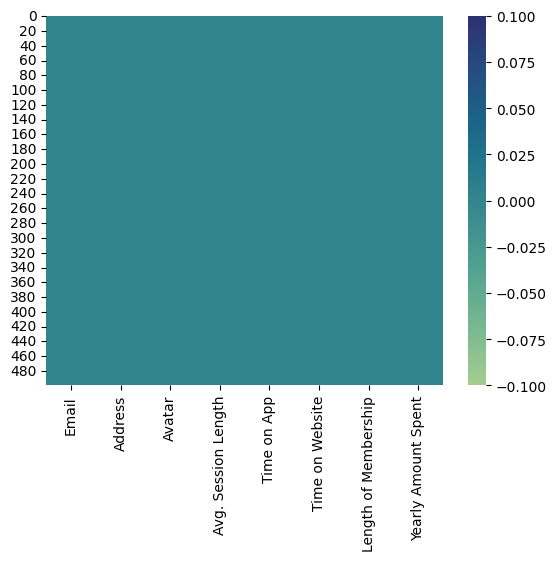

In [ ]:
print(f"NaN values: {df.isna().sum(axis=1).sum()}")

# Null values
print(f"Null values: {df.isnull().sum(axis=1).sum()}")

sns.heatmap(df.isnull() * df.isna(), cmap='crest')

In [ ]:
print(f'Duplicated Values: {df.duplicated().sum()}')

Duplicated Values: 0


In [ ]:
# Total Time And State

In [ ]:
df['Total Time'] = df['Time on App'] + df['Time on Website']
df[ 'State'] = df['Address'].apply(lambda x: x.split()[-2])
df[ 'Email Provider'] = df[ 'Email'].apply(lambda x: x.split("@")[1])
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Total Time,State,Email Provider
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,52.233319,MI,fernandez.com
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,48.378420,CA,hotmail.com
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,48.440875,DC,yahoo.com
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,50.438796,OH,gmail.com
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,50.331842,PR,davidson-herman.com
...,...,...,...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438,49.984144,UT,craig-evans.com
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004,48.886004,CA,gmail.com
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145,49.831985,TN,hotmail.com
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510,49.231509,TX,hotmail.com


In [ ]:
df.value_counts('Email Provider')

,count
Email Provider,
hotmail.com,87
gmail.com,87
yahoo.com,76
barber.com,2
johnson.com,2
...,...
williamson-boyd.org,1
wilson.com,1
wright.com,1


In [ ]:
df.value_counts('State')

,count
State,
AE,18
AA,17
DE,13
MO,13
SC,13
...,...
MP,5
WI,5
UT,5


In [ ]:
# Customer with the max time and spending

In [ ]:
max_time_customer = df.loc[df['Total Time'].idxmax()]
print("Customer with the maximum Total Time:")
display(max_time_customer)

max_spending_customer = df.loc[df['Yearly Amount Spent'].idxmax()]
print("\nCustomer with the maximum Yearly Amount Spent:")
display(max_spending_customer)

Customer with the maximum Total Time:


,255
Email,pkline@hotmail.com
Address,"PSC 6338, Box 7637\nAPO AA 22066"
Avatar,MediumTurquoise
Avg. Session Length,33.136655
Time on App,13.891313
Time on Website,39.220713
Length of Membership,2.907095
Yearly Amount Spent,524.797628
Total Time,53.112026
State,AA



Customer with the maximum Yearly Amount Spent:


,65
Email,kyang@diaz.org
Address,"223 Love Trail Suite 831\nPort Jeffrey, IN 46849"
Avatar,OliveDrab
Avg. Session Length,34.374258
Time on App,15.126994
Time on Website,37.157624
Length of Membership,5.377594
Yearly Amount Spent,765.518462
Total Time,52.284618
State,IN


In [ ]:
# Customers with max time and spending

In [ ]:
s=df.select_dtypes(np.number).idxmax()
pd.Series(data=df.loc[s]['Email'].values, index=s.index)

,0
Avg. Session Length,nathan86@hotmail.com
Time on App,kyang@diaz.org
Time on Website,davisrobert@hicks-smith.com
Length of Membership,asilva@yahoo.com
Yearly Amount Spent,kyang@diaz.org
Total Time,pkline@hotmail.com


In [ ]:
# customers with min time and spending

In [ ]:
s=df.select_dtypes(np.number).idxmin()
pd.Series(data=df.loc[s]['Email'].values, index=s.index)

,0
Avg. Session Length,knelson@gmail.com
Time on App,dblair@gmail.com
Time on Website,asilva@yahoo.com
Length of Membership,sharongraves@yahoo.com
Yearly Amount Spent,alexandra26@summers-davis.com
Total Time,dblair@gmail.com


In [ ]:
# States with the max time and spending

In [ ]:
df.groupby(by='State').sum().idxmax()

,0
Email,MP
Address,AP
Avatar,ID
Avg. Session Length,AE
Time on App,AE
Time on Website,AE
Length of Membership,AE
Yearly Amount Spent,AE
Total Time,AE
Email Provider,WV


In [ ]:
df.groupby(by='State').sum().idxmin()

,0
Email,OK
Address,AL
Avatar,WI
Avg. Session Length,ID
Time on App,ID
Time on Website,ID
Length of Membership,ID
Yearly Amount Spent,ID
Total Time,ID
Email Provider,AZ


In [ ]:
# Differences between customers over spending time and money

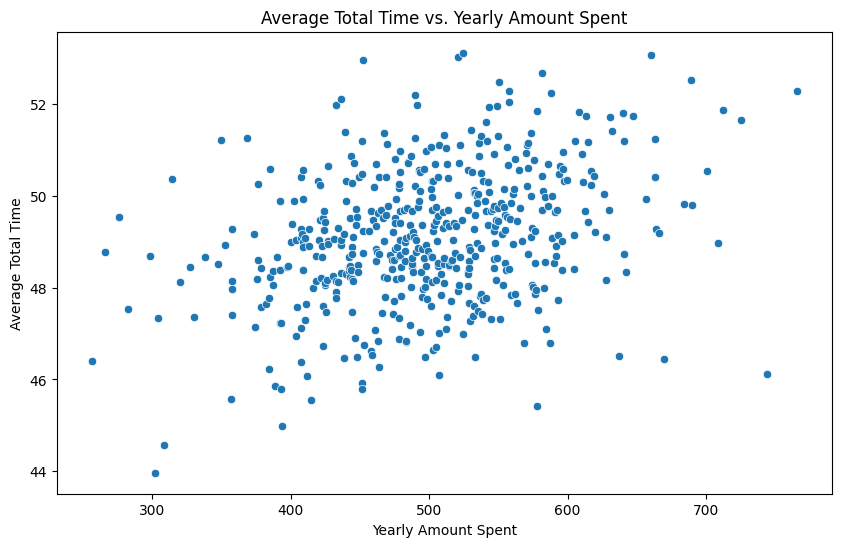


Summary statistics for Yearly Amount Spent vs. Total Time:


,Yearly Amount Spent,Total Time
count,500.000000,500.000000
mean,499.314038,49.112933
std,79.314782,1.474820
min,256.670582,43.970552
25%,445.038277,48.192759
50%,498.887875,49.056487
75%,549.313828,50.098144
max,765.518462,53.112026


In [ ]:
customers_spend_vs_time = df.groupby('Yearly Amount Spent')['Total Time'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=customers_spend_vs_time, x='Yearly Amount Spent', y='Total Time')
plt.title('Average Total Time vs. Yearly Amount Spent')
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Average Total Time')
plt.show()

print("\nSummary statistics for Yearly Amount Spent vs. Total Time:")
display(customers_spend_vs_time.describe())

In [ ]:
df.describe().loc['std',:]

,std
Avg. Session Length,0.992563
Time on App,0.994216
Time on Website,1.010489
Length of Membership,0.999278
Yearly Amount Spent,79.314782
Total Time,1.474820


In [ ]:
df.describe().loc['mean',:]

,mean
Avg. Session Length,33.053194
Time on App,12.052488
Time on Website,37.060445
Length of Membership,3.533462
Yearly Amount Spent,499.314038
Total Time,49.112933


In [ ]:
df.describe().loc['std',:] / df.describe().loc['mean',:] * 100

,0
Avg. Session Length,3.002927
Time on App,8.249049
Time on Website,2.726597
Length of Membership,28.280412
Yearly Amount Spent,15.884749
Total Time,3.002916


In [ ]:
# Difference between states over spending time and money

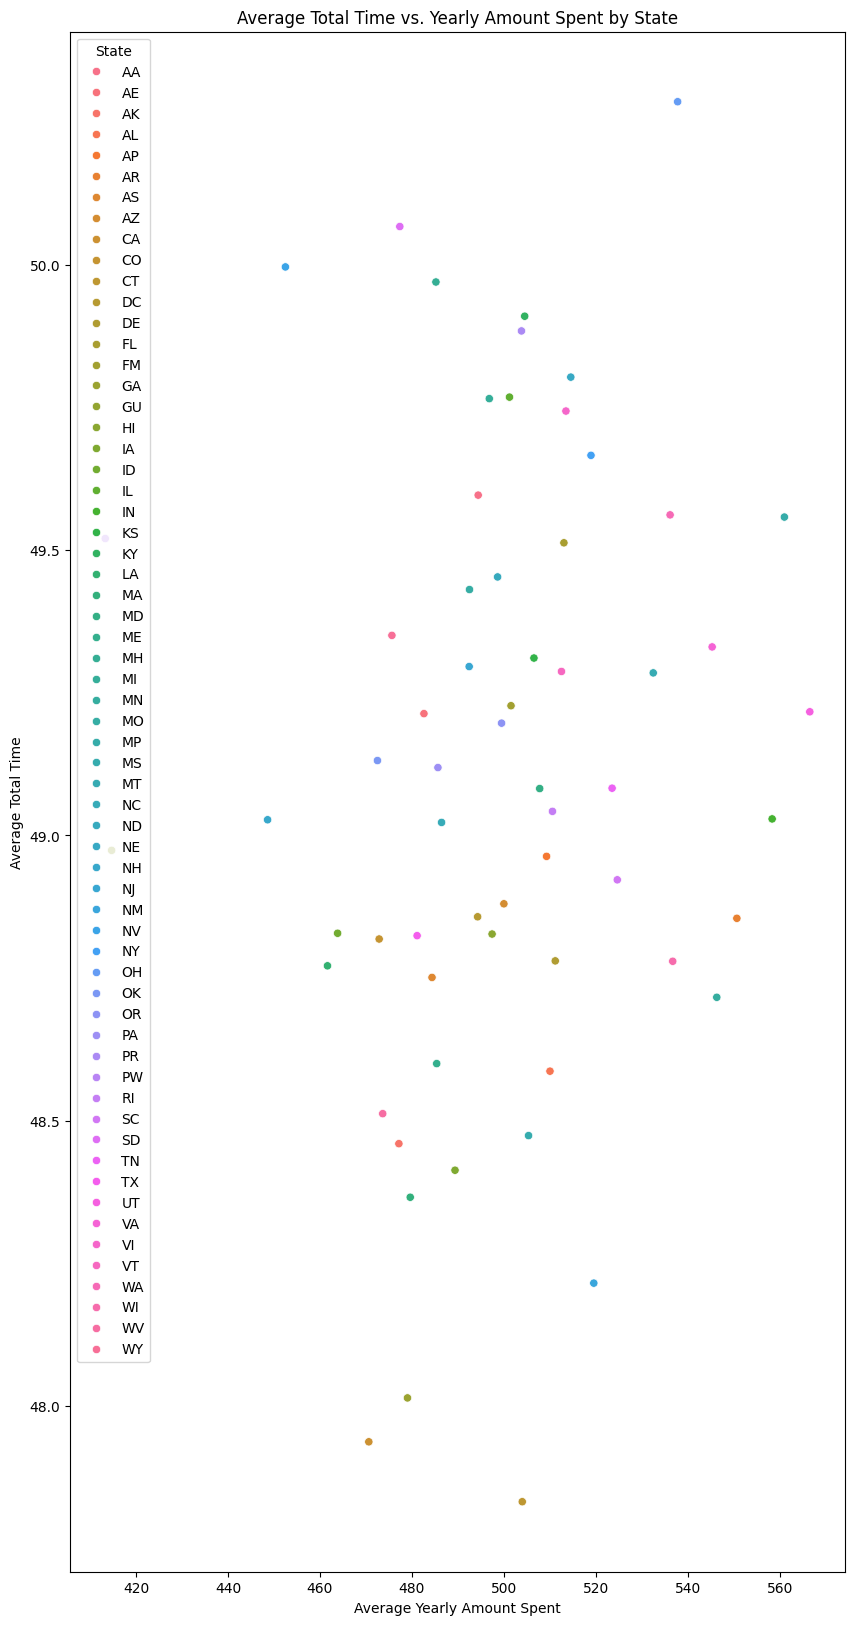


Summary statistics for Yearly Amount Spent vs. Total Time by State:


,Yearly Amount Spent,Total Time
count,62.000000,62.000000
mean,499.446048,49.108191
std,30.478843,0.537266
min,413.315738,47.831686
25%,481.486674,48.789612
50%,499.731111,49.082516
75%,513.361471,49.498128
max,566.491138,50.286526


In [ ]:
state_spend_vs_time = df.groupby('State')[['Yearly Amount Spent', 'Total Time']].mean().reset_index()

plt.figure(figsize=(10, 20))
sns.scatterplot(data=state_spend_vs_time, x='Yearly Amount Spent', y='Total Time', hue='State')
plt.title('Average Total Time vs. Yearly Amount Spent by State')
plt.xlabel('Average Yearly Amount Spent')
plt.ylabel('Average Total Time')
plt.show()

print("\nSummary statistics for Yearly Amount Spent vs. Total Time by State:")
display(state_spend_vs_time.describe())

In [ ]:
# Difference between states over spending time and money

In [ ]:
df[df.columns[3:-1]].groupby(by='State').mean().std(axis=0)

,0
Avg. Session Length,0.401449
Time on App,0.336424
Time on Website,0.354953
Length of Membership,0.415163
Yearly Amount Spent,30.478843
Total Time,0.537266


In [ ]:
# difference between states over spending time and money: cofficient of variation

In [ ]:
state_grouped = df.groupby(by='State')[['Yearly Amount Spent', 'Total Time']]
state_cv = state_grouped.std() / state_grouped.mean() * 100
print("\nCoefficient of Variation for Yearly Amount Spent and Total Time by State:")
display(state_cv)


Coefficient of Variation for Yearly Amount Spent and Total Time by State:


,Yearly Amount Spent,Total Time
State,,
AA,14.565655,3.756826
AE,19.237903,3.746763
AK,15.070261,2.848605
AL,11.539231,2.571407
AP,21.848653,3.913580
...,...,...
VT,19.166456,1.988109
WA,14.912331,3.065079
WI,15.498130,0.867856


In [ ]:
df[df.columns[3:-1]].groupby(by='State').mean().std(axis=0) / df[df.columns[3:-1]].groupby(by='State').mean().mean(axis=0) * 100

,0
Avg. Session Length,1.215184
Time on App,2.787503
Time on Website,0.958318
Length of Membership,11.758835
Yearly Amount Spent,6.102530
Total Time,1.094045


In [ ]:
# top five state spend time on app
df.groupby(by='State')['Time on App'].sum().sort_values(ascending=False).head()

,Time on App
State,
AE,218.279702
AA,209.622937
MO,156.271069
DE,154.928321
SC,154.071771


In [ ]:
df.groupby(by='Email')['Time on App'].sum().sort_values(ascending=False).head()

,Time on App
Email,
kyang@diaz.org,15.126994
alejandro75@hotmail.com,14.715388
george02@hotmail.com,14.426491
bhill@pierce-kane.info,14.325655
vancealicia@hotmail.com,14.288015


In [ ]:
x = df[['Time on Website']]
y = df[['Time on App']]

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
print(x_train.shape)

(350, 1)


In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.fit(x_test, y_test)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

[[12.30024786]
 [12.03743002]
 [12.16950527]
 [12.0644825 ]
 [12.17355137]
 [12.21368683]
 [11.87459087]
 [12.10773147]
 [12.12211995]
 [12.11786562]
 [12.05226091]
 [12.15197458]
 [11.84656118]
 [11.9233183 ]
 [12.17825069]
 [11.92504616]
 [11.95734871]
 [11.92415262]
 [12.06954248]
 [12.03269878]
 [12.12270391]
 [12.00889762]
 [12.10521459]
 [12.13299062]
 [11.98486885]
 [11.80640371]
 [12.20724179]
 [11.91057822]
 [12.08360528]
 [11.98056607]
 [11.94180482]
 [12.19895171]
 [12.01132552]
 [12.0254669 ]
 [12.04774873]
 [11.88483976]
 [11.79695722]
 [11.93738118]
 [12.13477554]
 [12.08666349]
 [11.92747875]
 [12.12786062]
 [11.94915857]
 [12.04174789]
 [12.27843594]
 [11.88875335]
 [12.36975154]
 [12.04478965]
 [12.26710602]
 [12.25963655]
 [12.16469306]
 [12.12196873]
 [12.28767476]
 [12.26507389]
 [11.94688297]
 [11.80519561]
 [12.02699048]
 [12.19569573]
 [11.83229433]
 [12.19157863]
 [12.15939243]
 [12.01436338]
 [12.11766772]
 [12.05921237]
 [12.02217143]
 [11.95127887]
 [12.01234

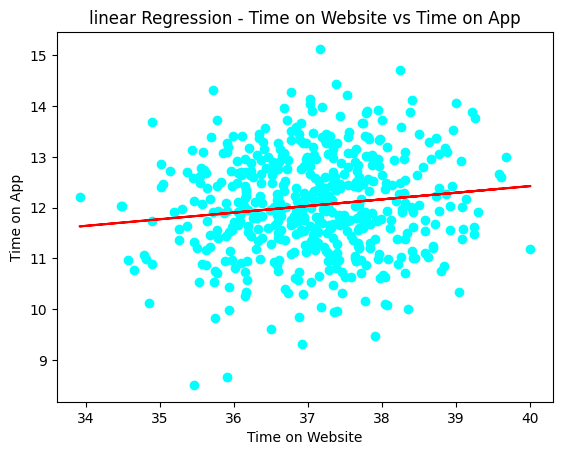

In [ ]:
plt.scatter(x,y, color='cyan')
plt.plot(x,model.predict(x), color='red')
plt.xlabel("Time on Website")
plt.ylabel("Time on App")
plt.title("linear Regression - Time on Website vs Time on App")
plt.show()

In [ ]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.01697223008769755


In [ ]:
try:
  experience = float(input("Enter your Time on App: "))
  prediction = model.predict([[experience]])
  print(f"Prediction time: {prediction[0][0]:f}")
except ValueError:
  print('Please enter a valid number.')

Enter your Time on App: 
Please enter a valid number.


In [ ]:
import joblib